## Jesus Rodrigo Colina Nunez




## Data Understanding

Let's first load the data and understand the attributes meanings, shape of the dataset etc.

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load Files

df = pd.read_csv('Annual_Population_Change.csv')  #MAYBE

df2 = pd.read_csv('Estimated_Population_from_2006.csv') #YES

df3 = pd.read_csv('Estimated_Population_from_2011.csv')



In [4]:
df_1=df.copy()

In [12]:
df.shape

# Get the shape of the data (rows and columns)

(584, 5)

In [4]:
df.columns 

Index(['STATISTIC Label', 'Year', 'Component', 'UNIT', 'VALUE'], dtype='object')

In [11]:
 # Get the data types of each column
df.dtypes

STATISTIC Label     object
Year                 int64
Component           object
UNIT                object
VALUE              float64
dtype: object

In [8]:
df.describe() # Get some descriptive statistics

,Year,VALUE
count,584.000000,440.000000
mean,1987.000000,633.262273
std,21.089371,1378.671718
min,1951.000000,-58.000000
25%,1969.000000,24.775000
50%,1987.000000,35.550000
75%,2005.000000,70.775000
max,2023.000000,5281.600000


In [9]:
df.isnull().sum() #Check for missing values 

STATISTIC Label      0
Year                 0
Component            0
UNIT                 0
VALUE              144
dtype: int64

In [13]:
df.head()

,STATISTIC Label,Year,Component,UNIT,VALUE
0,Annual Population Change,1951,Annual births,Thousand,NaN
1,Annual Population Change,1951,Annual deaths,Thousand,NaN
2,Annual Population Change,1951,Natural increase,Thousand,26.6
3,Annual Population Change,1951,Immigrants,Thousand,NaN
4,Annual Population Change,1951,Emigrants,Thousand,NaN


In [14]:
df.columns

Index(['STATISTIC Label', 'Year', 'Component', 'UNIT', 'VALUE'], dtype='object')

In [16]:
df2.corr() # Calculate the correlation matrix of numeric columns

,Year,VALUE
Year,1.00000,0.04022
VALUE,0.04022,1.00000


In [4]:
df1.head()

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
0,Population Estimates (Persons in April),1950,Under 1 year,Both sexes,Thousand,61.1
1,Population Estimates (Persons in April),1950,Under 1 year,Male,Thousand,31.4
2,Population Estimates (Persons in April),1950,Under 1 year,Female,Thousand,29.7
3,Population Estimates (Persons in April),1950,0 - 4 years,Both sexes,Thousand,NaN
4,Population Estimates (Persons in April),1950,0 - 4 years,Male,Thousand,NaN


In [6]:
df2.head()

,Statistic Label,Year,Sex,Citizenship,UNIT,VALUE
0,Estimated Population,2006,Both sexes,All Countries,Thousand,4232.9
1,Estimated Population,2006,Both sexes,EU14 excl Irl (countries in the EU pre 2004 ex...,Thousand,43.8
2,Estimated Population,2006,Both sexes,EU15 to EU27 (accession countries joined post ...,Thousand,132.5
3,Estimated Population,2006,Both sexes,United Kingdom,Thousand,115.5
4,Estimated Population,2006,Both sexes,Ireland,Thousand,3802.4


In [12]:
df3.head()

,STATISTIC Label,Year,Age Group,Sex,Region,UNIT,VALUE
0,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,State,Thousand,356.0
1,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,Border,Thousand,30.7
2,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,West,Thousand,32.6
3,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,Mid-West,Thousand,35.0
4,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,South-East,Thousand,32.0


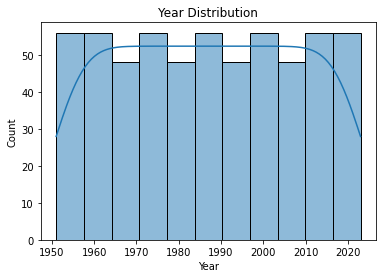

In [4]:
sns.histplot(data=df, x='Year', kde=True)  #SEPARAR POR GRUPOS
plt.title('Year Distribution')
plt.show()

In [5]:
df2.head()

,Statistic Label,Year,Sex,Citizenship,UNIT,VALUE
0,Estimated Population,2006,Both sexes,All Countries,Thousand,4232.9
1,Estimated Population,2006,Both sexes,EU14 excl Irl (countries in the EU pre 2004 ex...,Thousand,43.8
2,Estimated Population,2006,Both sexes,EU15 to EU27 (accession countries joined post ...,Thousand,132.5
3,Estimated Population,2006,Both sexes,United Kingdom,Thousand,115.5
4,Estimated Population,2006,Both sexes,Ireland,Thousand,3802.4


## Population trend over the years

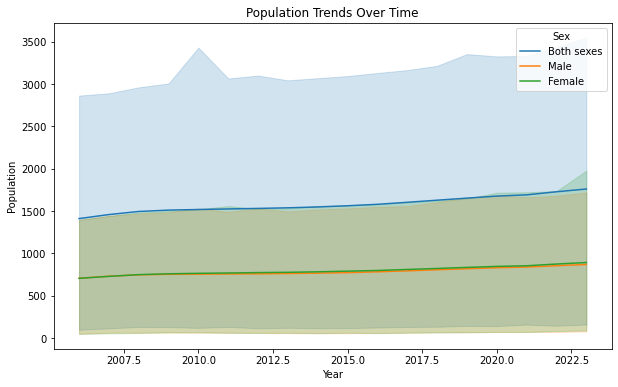

In [8]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df2, x="Year", y="VALUE", hue="Sex")
plt.title("Population Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend(title="Sex")
plt.show()

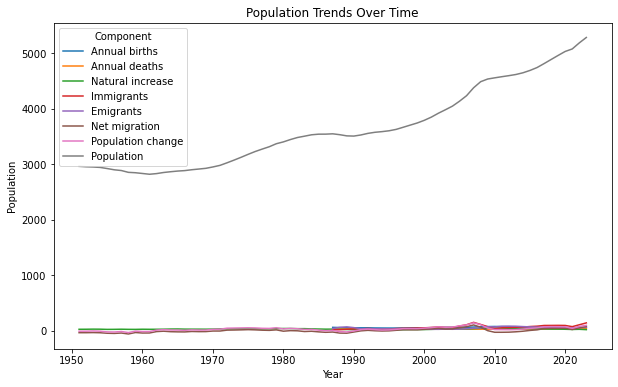

In [16]:
# DF no name !!! ##############


plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Year", y="VALUE", hue="Component")
plt.title("Population Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend(title="Component")
plt.show()

## Compare the population by citizenship.

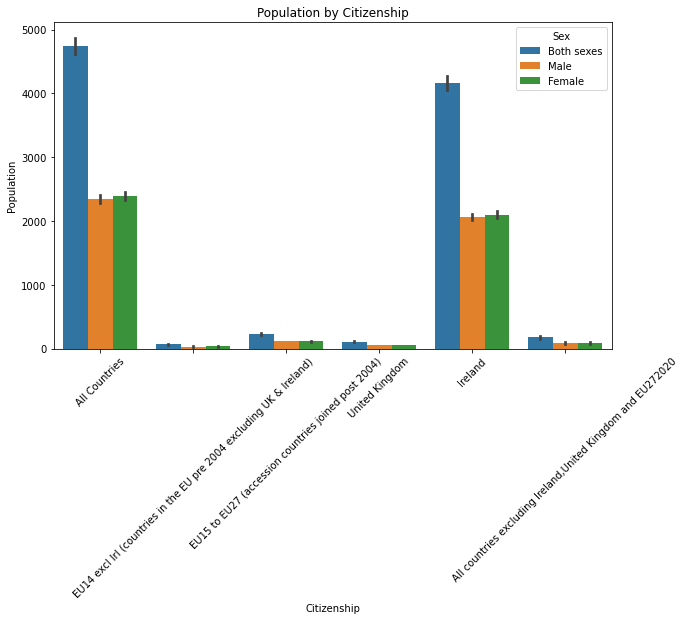

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df2, x="Citizenship", y="VALUE", hue="Sex")
plt.title("Population by Citizenship")
plt.xlabel("Citizenship")
plt.ylabel("Population")
plt.xticks(rotation=45)
plt.legend(title="Sex")
plt.show()

## Examine the distribution of values (population) for different units.

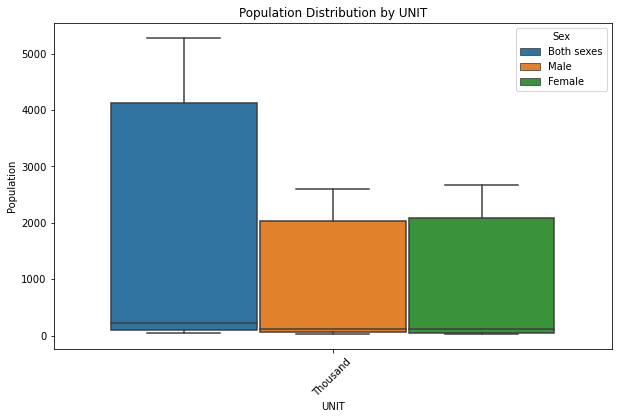

In [10]:
## Eliminarque edades hay mas, Eliminar ambos 

plt.figure(figsize=(10, 6))
sns.boxplot(data=df2, x="UNIT", y="VALUE", hue="Sex")
plt.title("Population Distribution by UNIT")
plt.xlabel("UNIT")
plt.ylabel("Population")
plt.xticks(rotation=45)
plt.legend(title="Sex")
plt.show()

## Explore relationships between numerical variables (e.g., "Year" and "VALUE") by sex.

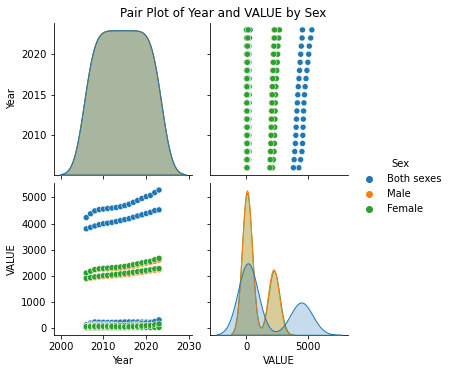

In [11]:
sns.pairplot(df2, hue="Sex", vars=["Year", "VALUE"])
plt.suptitle("Pair Plot of Year and VALUE by Sex", y=1.02)
plt.show()

## Visualize correlations between variables, e.g., "Year" and "VALUE."

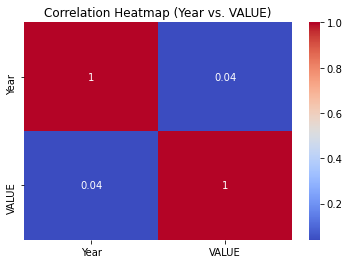

In [12]:
correlation_matrix = df2[["Year", "VALUE"]].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Year vs. VALUE)")
plt.show()